## HW5

## Github - abhishekajmera

## USC ID - 8586888981


## 1. Decision Trees as Interpretable Models late days -1 
(a)
Download the Accute Inflamations data from
https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
import matplotlib.pyplot as plt

In [42]:
link1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data"
df = pd.read_csv(link1 , sep = '\t', header = None, encoding='utf-16', names = ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing (continuous need for urination)','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','Inflammation','Nephritis'])
from sklearn import tree

In [43]:
df['Temperature of patient'] = df['Temperature of patient'].str.replace(',','.')
df['Temperature of patient'] = df['Temperature of patient'].astype('float64')

In [44]:
for i in df.columns:
    if i != 'Temperature of patient':
        df[i]=df[i].replace({'no':0})
        df[i]=df[i].replace({'yes':1})

In [45]:
df

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


(b)
Build a decision tree on the whole data set and plot it

In [46]:
from sklearn.tree import DecisionTreeClassifier
x = df.drop("Nephritis", axis =1)
x = x.drop("Inflammation", axis =1)
y = df[["Nephritis", "Inflammation"]]
clf = DecisionTreeClassifier(random_state= 42)
clf = clf.fit(x, y)

In [47]:
cols = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain',
       'Urine pushing (continuous need for urination)', 'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet']

[Text(669.6, 1223.1, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[70, 50]\n[61, 59]]'),
 Text(334.8, 951.3, 'Urine pushing (continuous need for urination) <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[60, 0]\n[20, 40]]'),
 Text(167.4, 679.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(502.20000000000005, 679.5, 'gini = 0.0\nsamples = 40\nvalue = [[40, 0]\n[0, 40]]'),
 Text(1004.4000000000001, 951.3, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[10, 50]\n[41, 19]]'),
 Text(837.0, 679.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(1171.8, 679.5, 'Occurrence of nausea <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[0, 50]\n[31, 19]]'),
 Text(1004.4000000000001, 407.69999999999993, 'gini = 0.0\nsamples = 21\nvalue = [[0, 21]\n[21, 0]]'),
 Text(1339.2, 407.69999999999993, 'Urine pushing (continuous need for urination) <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[0, 29]\n[10, 19]]'),
 Text(1171.8, 135.8999999999998

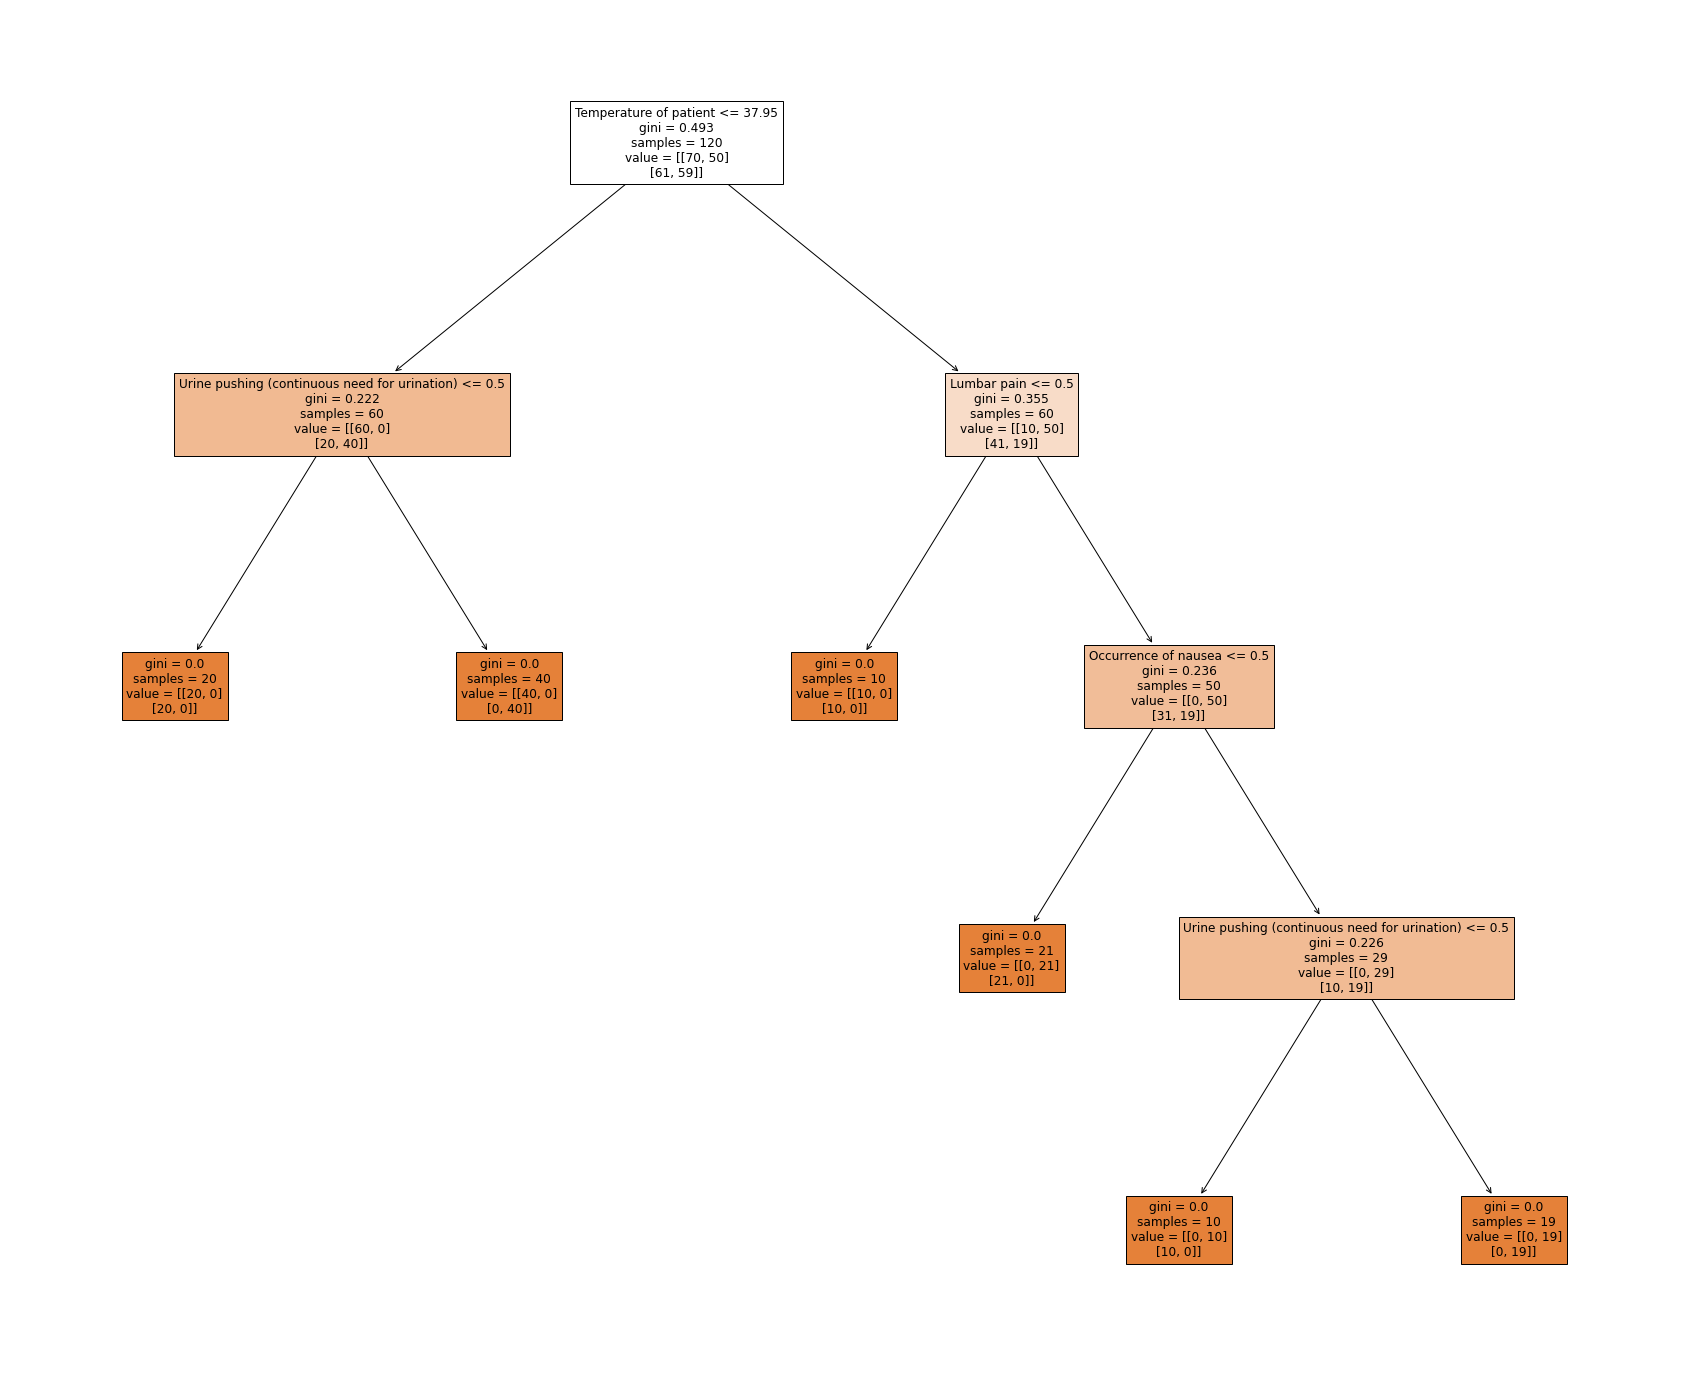

In [48]:
fig = plt.figure(figsize = (30,25))
tree.plot_tree(clf, feature_names= cols, class_names = ["Nephritis","Inflammation"], filled = True)

(c)
Convert the decision rules into a set of IF-THEN rules

In [49]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):


    tree_ = tree.tree_
    feature_name = [
    feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [50]:
from sklearn.tree import export_graphviz
tree_to_code(clf, x.columns)
clf

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing (continuous need for urination), Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Urine pushing (continuous need for urination) <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine pushing (continuous need for urination) > 0.5
      return [[40.  0.]
 [ 0. 40.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[ 0. 21.]
 [21.  0.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing (continuous need for urination) <= 0.5:
          return [[ 0. 10.]
 [10.  0.]]
        else:  # if Urine pushing (continuous need for urination) > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


DecisionTreeClassifier(random_state=42)

(d)
Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(x, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])

In [52]:
impurities

array([0.        , 0.09816667, 0.17763889, 0.28875   , 0.49298611])

In [53]:
a = path['ccp_alphas']
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_val = GridSearchCV(decision_tree, {'ccp_alpha':a},cv =10)
decision_tree_val = decision_tree_val.fit(x,y)
best_a = decision_tree_val.best_params_['ccp_alpha']

In [54]:
best_a

0.0

In [55]:
min_tree = DecisionTreeClassifier(ccp_alpha = best_a, random_state = 42)
min_tree = min_tree.fit(x,y)

[Text(669.6, 1223.1, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[70, 50]\n[61, 59]]'),
 Text(334.8, 951.3, 'Urine pushing (continuous need for urination) <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[60, 0]\n[20, 40]]'),
 Text(167.4, 679.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(502.20000000000005, 679.5, 'gini = 0.0\nsamples = 40\nvalue = [[40, 0]\n[0, 40]]'),
 Text(1004.4000000000001, 951.3, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[10, 50]\n[41, 19]]'),
 Text(837.0, 679.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(1171.8, 679.5, 'Occurrence of nausea <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[0, 50]\n[31, 19]]'),
 Text(1004.4000000000001, 407.69999999999993, 'gini = 0.0\nsamples = 21\nvalue = [[0, 21]\n[21, 0]]'),
 Text(1339.2, 407.69999999999993, 'Urine pushing (continuous need for urination) <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[0, 29]\n[10, 19]]'),
 Text(1171.8, 135.8999999999998

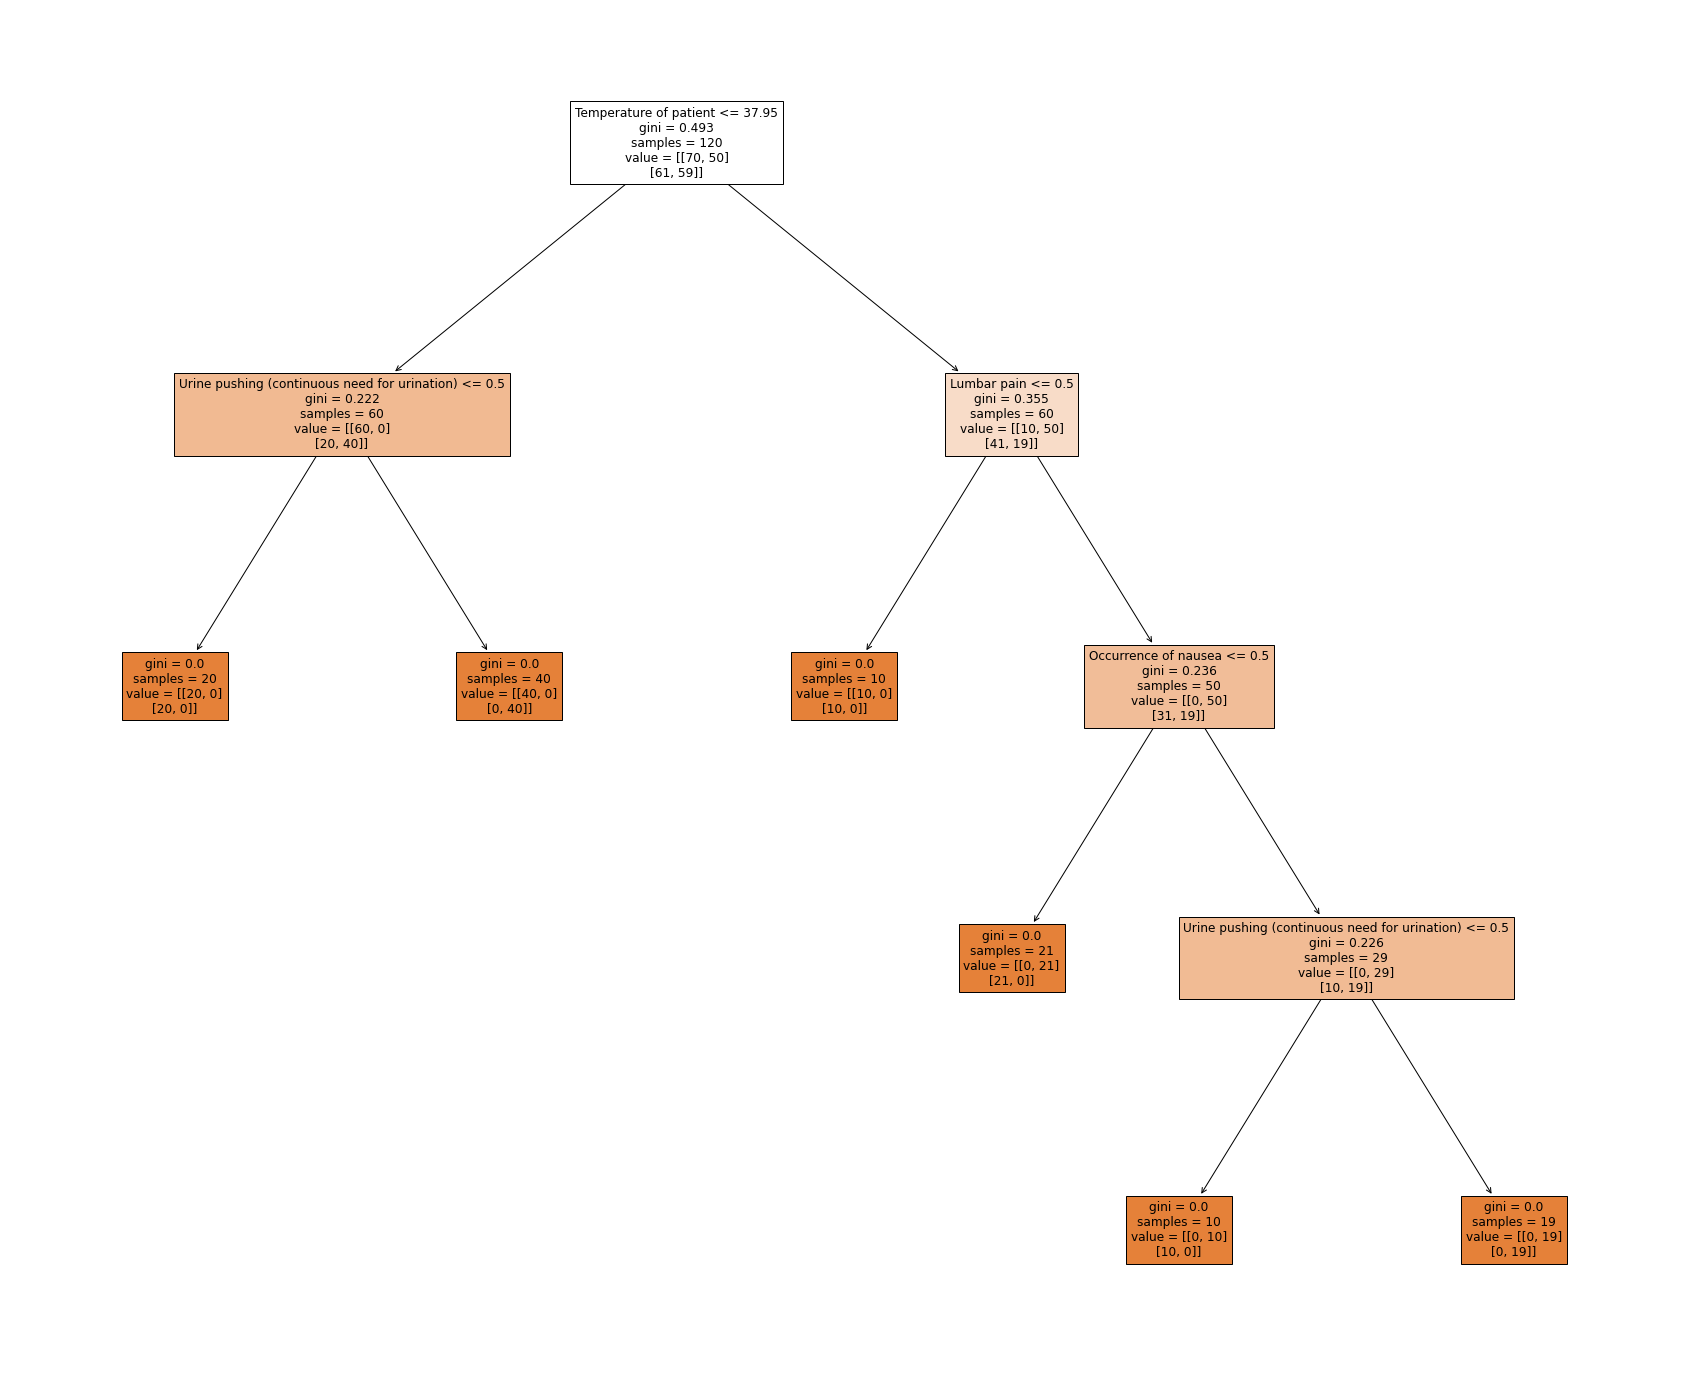

In [56]:
fig = plt.figure(figsize = (30,25))
tree.plot_tree(min_tree, feature_names = x.columns, filled = True)

In [57]:
tree_to_code(min_tree, x.columns)

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing (continuous need for urination), Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Urine pushing (continuous need for urination) <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine pushing (continuous need for urination) > 0.5
      return [[40.  0.]
 [ 0. 40.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[ 0. 21.]
 [21.  0.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing (continuous need for urination) <= 0.5:
          return [[ 0. 10.]
 [10.  0.]]
        else:  # if Urine pushing (continuous need for urination) > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


## 2. The LASSO and Boosting for Regression

(a)
Download the Communities and Crime data
3
from
https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime
. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [58]:
cdf = pd.read_csv('../Data/communities_data' , header= None)
# cdf.columns = names[0]

In [59]:
cols = pd.read_csv('../Data/communities_names.txt',header=None)

In [60]:
cdf = cdf.drop([0, 1, 2, 3, 4], axis=1)

In [61]:
# cdf.columns = list(cols[0])

In [62]:
variables = np.array(cols).flatten()

In [63]:
cdf.columns = variables

In [64]:
cdf

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [65]:
cdf_train = cdf[:1495]
cdf_train_y = cdf_train['ViolentCrimesPerPop']
cdf_train_x = cdf.drop('ViolentCrimesPerPop',axis =1)

In [66]:
cdf = cdf.replace({'?':None})

In [67]:
for i in cdf.columns:
    cdf[i]=cdf[i].astype('float64')
    

cdf.mean()

population             0.057593
householdsize          0.463395
racepctblack           0.179629
racePctWhite           0.753716
racePctAsian           0.153681
                         ...   
LemasPctPolicOnPatr    0.698589
LemasGangUnitDeploy    0.440439
LemasPctOfficDrugUn    0.094052
PolicBudgPerPop        0.195078
ViolentCrimesPerPop    0.237979
Length: 123, dtype: float64

(b)
The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features

In [68]:
cdf = cdf.fillna(cdf.mean())

In [69]:
cdf_train = cdf[:1495]
cdf_train_y = cdf_train['ViolentCrimesPerPop']
cdf_train_x = cdf_train.drop('ViolentCrimesPerPop',axis =1)
cdf_test = cdf[1495:]
cdf_test_y = cdf_test['ViolentCrimesPerPop']
cdf_test_x = cdf_test.drop('ViolentCrimesPerPop',axis =1)

(c)
Plot a correlation matrix for the features in the data set

In [70]:
# https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
matrix = cdf.corr()

In [71]:
matrix

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609147,0.595543,-0.061583,0.076527,0.466352,-0.035576,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032663,-0.007584,-0.006426,-0.000280,-0.094368,-0.054562,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.122017,0.083179,-0.082660,0.010987,0.260793,0.022237,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109191,-0.114860,0.052940,-0.033209,-0.276234,-0.006323,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.017992,0.067745,0.032389,0.065424,0.101888,-0.011619,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.061583,-0.006426,-0.082660,0.052940,0.032389,0.024366,0.000652,0.013327,0.013687,0.005601,...,-0.067678,0.055734,0.023457,-0.115349,-0.089736,1.000000,0.007179,0.021153,-0.237240,-0.039002
LemasGangUnitDeploy,0.076527,-0.000280,0.010987,-0.033209,0.065424,0.025956,0.011271,0.005145,-0.001001,-0.042756,...,0.109830,-0.076634,-0.082946,0.078436,0.023349,0.007179,1.000000,-0.015712,-0.021100,0.055038
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052426,-0.062677,0.021153,-0.015712,1.000000,0.018649,0.348627
PolicBudgPerPop,-0.035576,-0.054562,0.022237,-0.006323,-0.011619,0.002234,-0.076589,-0.068575,-0.049876,0.076586,...,-0.113166,0.067199,0.080024,0.245532,0.259342,-0.237240,-0.021100,0.018649,1.000000,0.045466


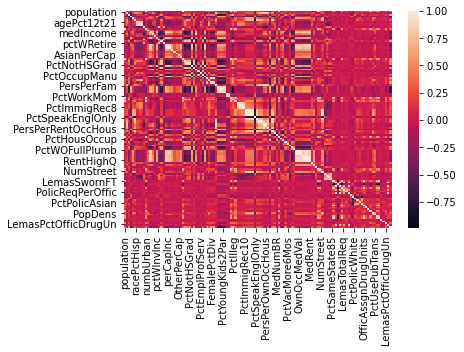

In [72]:
import seaborn as sns
sns.heatmap(matrix);

(d)
Calculate the Coefficient of Variation
CV
for each feature, where
CV
=
s /
m
, in
which
s
is sample standard deviation and
m
is sample mean.

In [73]:
# https://www.statology.org/coefficient-of-variation-in-python/
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
cv = pd.DataFrame(cdf.apply(cv))
cv.columns = ['CV']
cv

,CV
population,2.203503
householdsize,0.353298
racepctblack,1.410920
racePctWhite,0.323782
racePctAsian,1.359162
...,...
LemasPctPolicOnPatr,0.122331
LemasGangUnitDeploy,0.368040
LemasPctOfficDrugUn,2.555266
PolicBudgPerPop,0.337281


(e)
Pick
b
√
128
c
features with highest
CV
, and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [74]:
cv = cv.sort_values(by ='CV',ascending = False)
cv

,CV
NumStreet,4.407702
NumInShelters,3.485481
NumIlleg,2.994196
NumImmig,2.900497
LemasPctOfficDrugUn,2.555266
...,...
NumKindsDrugsSeiz,0.145956
RacialMatchCommPol,0.131417
LemasPctPolicOnPatr,0.122331
PctPolicWhite,0.121659


In [75]:
128 ** (1/2)


11.313708498984761

In [76]:
# Taking 1st 11 rows
cv_el=cv[:11]
cols_cv = cv_el.index.to_list()
cols_cv.append('ViolentCrimesPerPop')
cols_cv
cdf['NumStreet']
cols_cv

['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp',
 'ViolentCrimesPerPop']

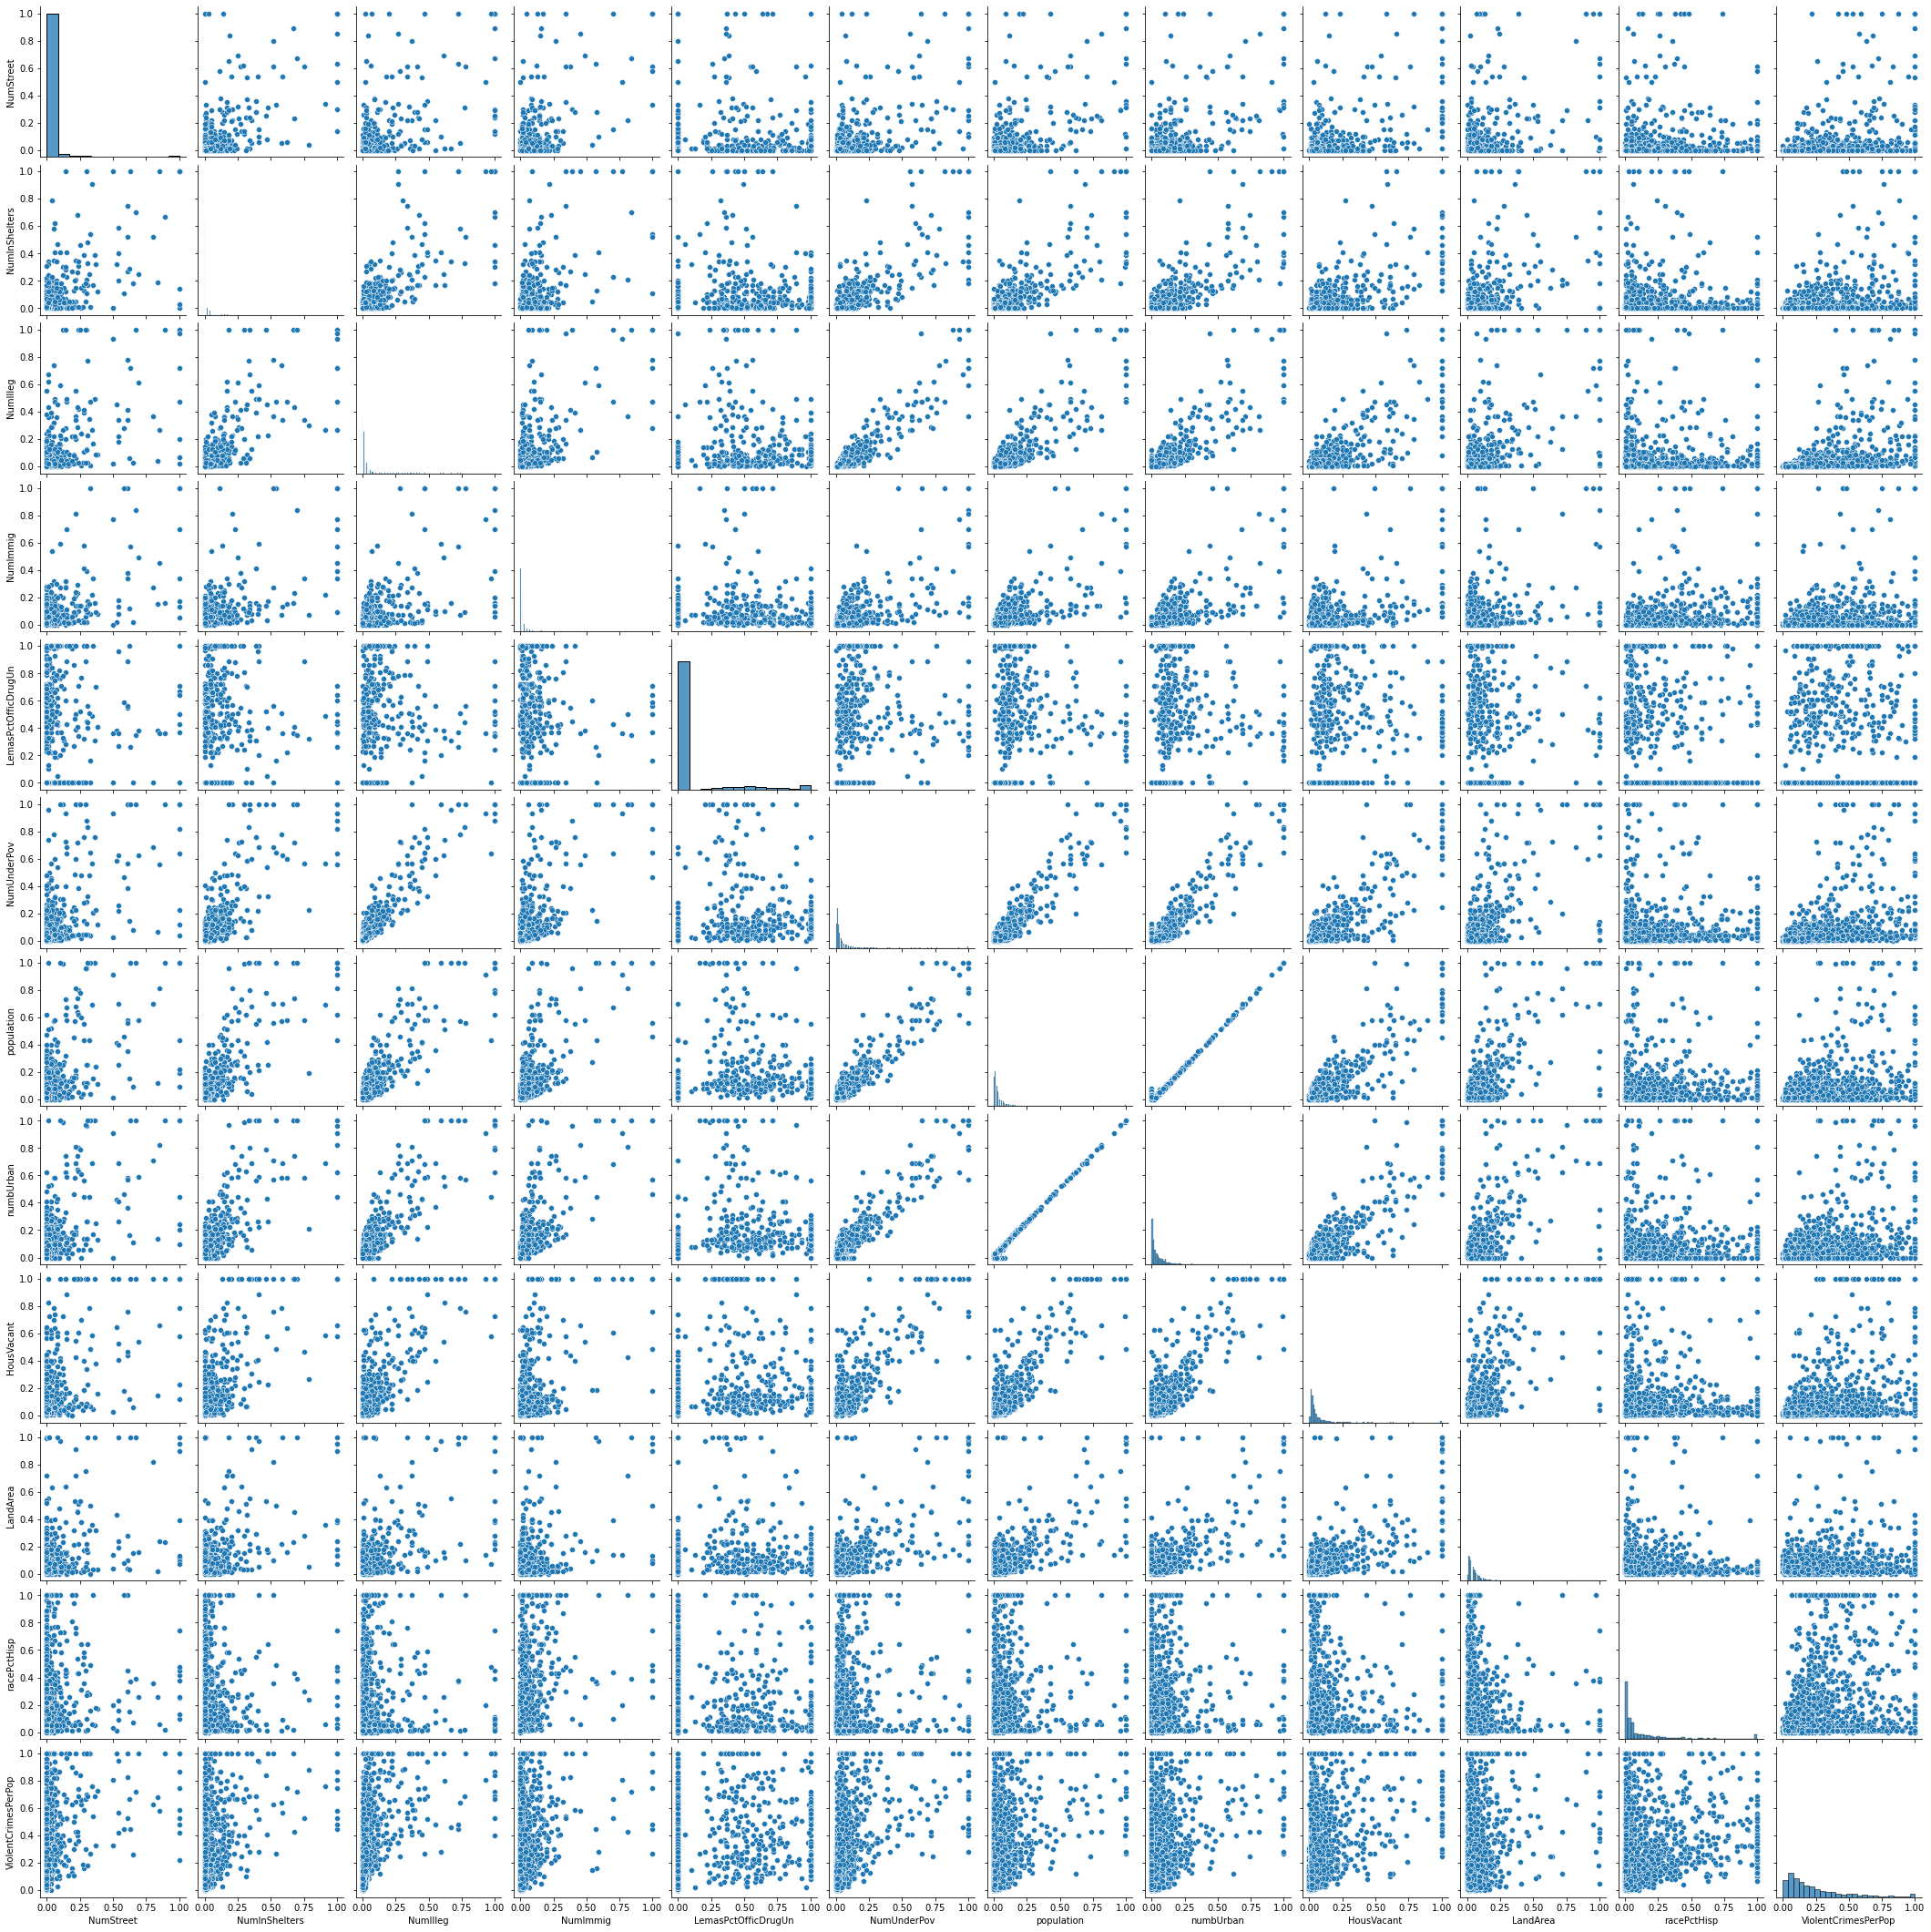

In [77]:
import seaborn as sns
plot = sns.pairplot(cdf, vars=cols_cv, kind='scatter')

In [ ]:
# Observation - strong positive relation between numUrban and population  and population and NumUnderPov.

<AxesSubplot:>

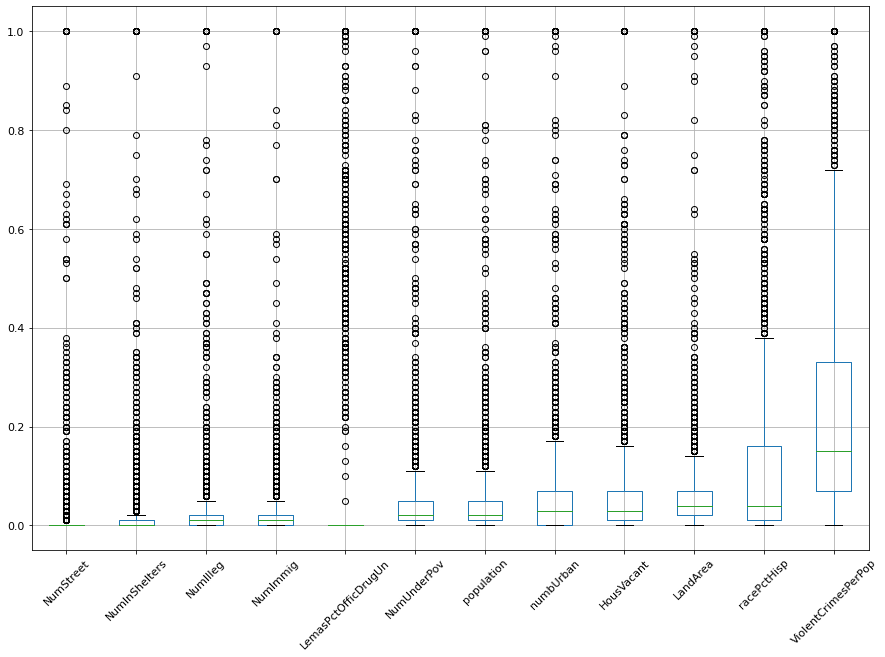

In [78]:
cdf[cols_cv].boxplot(rot=45, fontsize=11, figsize=(15, 10))

(f)
Fit a linear model using least squares to the training set and report the test error.

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
model = LinearRegression()

model.fit(cdf_train_x, cdf_train_y)
pred_y = model.predict(cdf_test_x)
mean_squared_error(cdf_test_y, pred_y)

0.7897255274361376

(g)
Fit a ridge regression model on the training set, with
λ
chosen by cross-validation.
Report the test error obtained.

In [80]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [81]:
from sklearn.linear_model import RidgeCV
rc=RidgeCV(alphas=alphas)
rc.fit(cdf_train_x, cdf_train_y)
pred_y = rc.predict(cdf_test_x)
mean_squared_error(cdf_test_y,pred_y)

0.017602376551784187

In [82]:
rc.alpha_

2.320794416806386

(h)
Fit a LASSO model on the training set, with
λ
chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized
4
features. Report the test error for both cases and
compare them

In [83]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LassoCV
lc=LassoCV(alphas=alphas)
lc.fit(cdf_train_x, cdf_train_y)
pred_y = lc.predict(cdf_test_x)
mean_squared_error(cdf_test_y,pred_y)

0.018805364920055027

In [84]:
lc.alpha_

0.005

In [85]:
best_features = []
for i in range(0, len(lc.coef_)):
    if lc.coef_[i]!=0:
        best_features.append(cdf_train.columns[i])


In [86]:
len(best_features)

8

In [87]:
from sklearn.preprocessing import StandardScaler

standard=StandardScaler()
standard.fit(cdf_train_x)

standard_train_x = standard.transform(cdf_train_x)
standard_test_x =standard.transform(cdf_test_x)


lc=LassoCV(alphas= alphas)
lc.fit(standard_train_x, cdf_train_y)
pred_y = lc.predict(standard_test_x)
mean_squared_error(cdf_test_y,pred_y)
# lc.alpha_

0.01738082158232027

In [88]:
best_features = []
for i in range(0, len(lc.coef_)):
    if lc.coef_[i]!=0:
        best_features.append(cdf_train.columns[i])

In [89]:
len(best_features)

25

In [90]:
# Normalized data got lower MSE

(i)
Fit a PCR model on the training set, with
M
(the number of principal compo-
nents) chosen by cross-validation. Report the test error obtained.

In [91]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
# features =
PCRErrors = {}
for m in range(1, len(cdf_train_x.columns)+1):
    kFolds = KFold(n_splits=10, shuffle=False)
    cdf_train_x_ar = np.array(cdf_train_x)
    cdf_train_y_ar = np.array(cdf_train_y)
    cvError = []
    for trainIdx, valIdx in kFolds.split(cdf_train_x_ar, cdf_train_y):
        # Get training data
        trainX = []
        trainY = []
        for idx in trainIdx:
            trainX.append(cdf_train_x.iloc[idx]) 
            trainY.append(cdf_train_y.iloc[idx]) 
        trainX = pd.DataFrame(trainX)
        trainY = pd.DataFrame(trainY)
        
        # Get validation data
        valX = []
        valY = []
        for idx in valIdx:
            valX.append(cdf_train_x.iloc[idx]) 
            valY.append(cdf_train_y.iloc[idx]) 
        valX = pd.DataFrame(valX)
        valY = pd.DataFrame(valY)
        
        # Find m principal components
        pca = PCA(n_components=m)
        pca = pca.fit(trainX)
        newTrainX = pca.transform(trainX)
        newValX = pca.transform(valX)
        
        pcrModel = LinearRegression()
        pcrModel = pcrModel.fit(newTrainX, trainY)
        cvPredictedY = pcrModel.predict(newValX).flatten()
        actualValY = np.array(valY).flatten()
        err = mean_squared_error(actualValY, cvPredictedY)  
        err = round(err, 3)
        cvError.append(err)
    PCRErrors[m] = np.mean(cvError)

In [92]:
tableData = []
for k,v in PCRErrors.items():
    row = []
    row.append(k)
    row.append(v)
    tableData.append(row)

In [93]:
tab = pd.DataFrame(tableData)
tab.columns = ['M', 'Error']
tab.sort_values(by = 'Error')

,M,Error
95,96,0.0191
89,90,0.0192
96,97,0.0192
97,98,0.0192
100,101,0.0192
...,...,...
4,5,0.0231
3,4,0.0244
2,3,0.0279
1,2,0.0307


(j)
In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use
L
1
-penalized regression at each node. Such a tree is called
L
1
penalized
gradient boosting tree. You can use XGBoost
5
to fit the model tree. Determine
α
(the regularization term) using cross-validation.

In [94]:
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
train_x = np.array(cdf_train_x)
train_y = np.array(cdf_train_y)

model = xgb.XGBRegressor(objective='reg:squarederror')
params = {'reg_alpha': alphas}
val = GridSearchCV(model, params, cv=10)
val = val.fit(train_x, train_y.flatten())

alfa = val.best_params_['reg_alpha']


In [95]:
alfa

1.328043891473342

In [96]:
test_x = np.array(cdf_test_x)
mod_fin = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=alfa)
finalXGBModel = mod_fin.fit(train_x, train_y)
y_pred = mod_fin.predict(test_x)
xgboostMSE = mean_squared_error(cdf_test_y, y_pred)
xgboostMSE = round(xgboostMSE, 3)

In [97]:
xgboostMSE

0.017